## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.824061 -1.186771 -0.002340 -1.185414 -1.229611 -1.941807
1  0.536250  0.779407  1.568427 -0.081864  0.000143  1.594121
2 -0.603402 -1.106705  1.155517 -0.865288 -0.077517 -1.236097
3 -0.346015 -0.171383 -1.209238 -1.222072  0.146124 -0.539814
4 -0.329513  1.178948 -0.129385  0.947623  1.859052  1.699657


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9403522	total: 58.1ms	remaining: 58s
1:	learn: 0.9317157	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9211466	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9122427	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9035849	total: 60.2ms	remaining: 12s
5:	learn: 0.8959446	total: 60.7ms	remaining: 10.1s
6:	learn: 0.8863198	total: 61.3ms	remaining: 8.7s
7:	learn: 0.8777868	total: 61.8ms	remaining: 7.66s
8:	learn: 0.8701737	total: 62.4ms	remaining: 6.87s
9:	learn: 0.8632897	total: 63ms	remaining: 6.24s
10:	learn: 0.8549508	total: 63.5ms	remaining: 5.71s
11:	learn: 0.8461691	total: 64ms	remaining: 5.27s
12:	learn: 0.8379925	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8288469	total: 65ms	remaining: 4.58s
14:	learn: 0.8230644	total: 65.5ms	remaining: 4.3s
15:	learn: 0.8157407	total: 65.9ms	remaining: 4.05s
16:	learn: 0.8089464	total: 66.4ms	remaining: 3.84s
17:	learn: 0.8017127	total: 66.9ms	remaining: 3.65s
18:	learn: 0.7944683	total: 67.5ms	remaining: 3.48s
19:	

106:	learn: 0.4007129	total: 109ms	remaining: 909ms
107:	learn: 0.3983907	total: 109ms	remaining: 904ms
108:	learn: 0.3957139	total: 110ms	remaining: 898ms
109:	learn: 0.3929985	total: 110ms	remaining: 893ms
110:	learn: 0.3902118	total: 111ms	remaining: 887ms
111:	learn: 0.3870972	total: 111ms	remaining: 881ms
112:	learn: 0.3843186	total: 112ms	remaining: 876ms
113:	learn: 0.3818175	total: 112ms	remaining: 871ms
114:	learn: 0.3795348	total: 113ms	remaining: 866ms
115:	learn: 0.3774884	total: 113ms	remaining: 860ms
116:	learn: 0.3744920	total: 113ms	remaining: 856ms
117:	learn: 0.3717903	total: 114ms	remaining: 852ms
118:	learn: 0.3698272	total: 114ms	remaining: 847ms
119:	learn: 0.3671752	total: 115ms	remaining: 842ms
120:	learn: 0.3647670	total: 115ms	remaining: 837ms
121:	learn: 0.3624052	total: 116ms	remaining: 832ms
122:	learn: 0.3603744	total: 116ms	remaining: 827ms
123:	learn: 0.3577201	total: 117ms	remaining: 824ms
124:	learn: 0.3551154	total: 117ms	remaining: 820ms
125:	learn: 

272:	learn: 0.1412821	total: 187ms	remaining: 498ms
273:	learn: 0.1404589	total: 188ms	remaining: 497ms
274:	learn: 0.1400043	total: 188ms	remaining: 496ms
275:	learn: 0.1392417	total: 188ms	remaining: 494ms
276:	learn: 0.1385026	total: 189ms	remaining: 493ms
277:	learn: 0.1380889	total: 189ms	remaining: 492ms
278:	learn: 0.1371923	total: 190ms	remaining: 491ms
279:	learn: 0.1362967	total: 190ms	remaining: 489ms
280:	learn: 0.1352469	total: 191ms	remaining: 488ms
281:	learn: 0.1346319	total: 191ms	remaining: 487ms
282:	learn: 0.1335614	total: 192ms	remaining: 486ms
283:	learn: 0.1328182	total: 192ms	remaining: 484ms
284:	learn: 0.1321517	total: 193ms	remaining: 483ms
285:	learn: 0.1312694	total: 193ms	remaining: 482ms
286:	learn: 0.1305115	total: 194ms	remaining: 481ms
287:	learn: 0.1298892	total: 194ms	remaining: 480ms
288:	learn: 0.1293817	total: 195ms	remaining: 479ms
289:	learn: 0.1286585	total: 195ms	remaining: 478ms
290:	learn: 0.1283594	total: 196ms	remaining: 477ms
291:	learn: 

493:	learn: 0.0561282	total: 293ms	remaining: 300ms
494:	learn: 0.0558478	total: 293ms	remaining: 299ms
495:	learn: 0.0557800	total: 294ms	remaining: 298ms
496:	learn: 0.0557184	total: 294ms	remaining: 298ms
497:	learn: 0.0554406	total: 295ms	remaining: 297ms
498:	learn: 0.0553802	total: 295ms	remaining: 296ms
499:	learn: 0.0551335	total: 295ms	remaining: 295ms
500:	learn: 0.0550740	total: 296ms	remaining: 295ms
501:	learn: 0.0547305	total: 296ms	remaining: 294ms
502:	learn: 0.0546666	total: 297ms	remaining: 293ms
503:	learn: 0.0544026	total: 297ms	remaining: 292ms
504:	learn: 0.0543451	total: 297ms	remaining: 291ms
505:	learn: 0.0541065	total: 298ms	remaining: 291ms
506:	learn: 0.0540498	total: 298ms	remaining: 290ms
507:	learn: 0.0537935	total: 299ms	remaining: 289ms
508:	learn: 0.0537379	total: 299ms	remaining: 288ms
509:	learn: 0.0534768	total: 300ms	remaining: 288ms
510:	learn: 0.0534221	total: 300ms	remaining: 287ms
511:	learn: 0.0533680	total: 300ms	remaining: 286ms
512:	learn: 

651:	learn: 0.0331560	total: 370ms	remaining: 198ms
652:	learn: 0.0330044	total: 371ms	remaining: 197ms
653:	learn: 0.0329815	total: 372ms	remaining: 197ms
654:	learn: 0.0328762	total: 372ms	remaining: 196ms
655:	learn: 0.0328570	total: 373ms	remaining: 195ms
656:	learn: 0.0327715	total: 373ms	remaining: 195ms
657:	learn: 0.0327491	total: 374ms	remaining: 194ms
658:	learn: 0.0326454	total: 374ms	remaining: 194ms
659:	learn: 0.0325491	total: 375ms	remaining: 193ms
660:	learn: 0.0324647	total: 375ms	remaining: 192ms
661:	learn: 0.0323811	total: 376ms	remaining: 192ms
662:	learn: 0.0322985	total: 376ms	remaining: 191ms
663:	learn: 0.0322749	total: 376ms	remaining: 190ms
664:	learn: 0.0321931	total: 377ms	remaining: 190ms
665:	learn: 0.0321698	total: 377ms	remaining: 189ms
666:	learn: 0.0320648	total: 378ms	remaining: 189ms
667:	learn: 0.0319640	total: 378ms	remaining: 188ms
668:	learn: 0.0319457	total: 379ms	remaining: 187ms
669:	learn: 0.0318462	total: 379ms	remaining: 187ms
670:	learn: 

872:	learn: 0.0180756	total: 476ms	remaining: 69.3ms
873:	learn: 0.0179927	total: 477ms	remaining: 68.8ms
874:	learn: 0.0179605	total: 478ms	remaining: 68.2ms
875:	learn: 0.0179471	total: 478ms	remaining: 67.7ms
876:	learn: 0.0178760	total: 478ms	remaining: 67.1ms
877:	learn: 0.0178193	total: 479ms	remaining: 66.5ms
878:	learn: 0.0177496	total: 479ms	remaining: 66ms
879:	learn: 0.0176962	total: 480ms	remaining: 65.4ms
880:	learn: 0.0176821	total: 480ms	remaining: 64.9ms
881:	learn: 0.0176263	total: 481ms	remaining: 64.4ms
882:	learn: 0.0175748	total: 481ms	remaining: 63.8ms
883:	learn: 0.0175251	total: 482ms	remaining: 63.2ms
884:	learn: 0.0174724	total: 482ms	remaining: 62.7ms
885:	learn: 0.0174211	total: 483ms	remaining: 62.1ms
886:	learn: 0.0173563	total: 483ms	remaining: 61.5ms
887:	learn: 0.0173020	total: 484ms	remaining: 61ms
888:	learn: 0.0172824	total: 484ms	remaining: 60.4ms
889:	learn: 0.0172413	total: 484ms	remaining: 59.9ms
890:	learn: 0.0171683	total: 485ms	remaining: 59.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

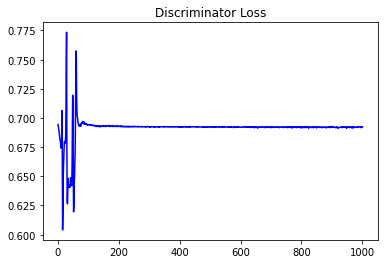

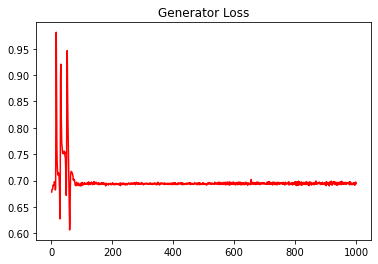

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12663430484280405


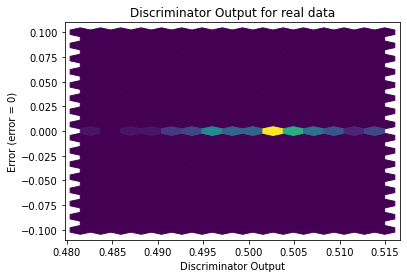

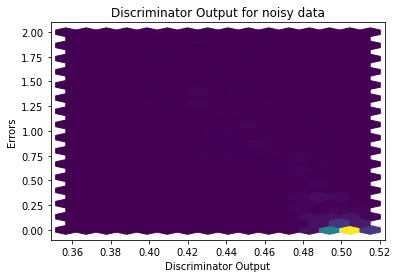

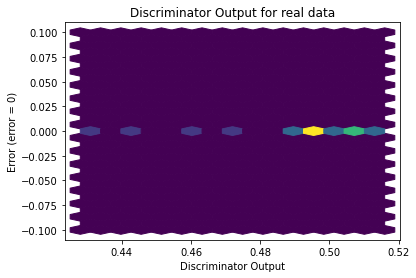

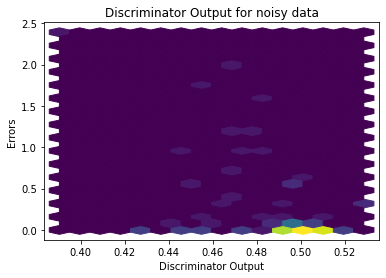

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


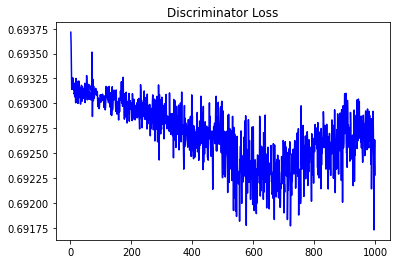

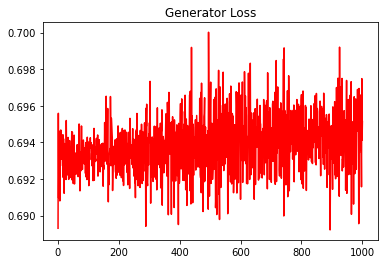

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1487106592451138


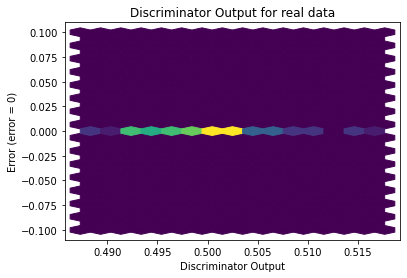

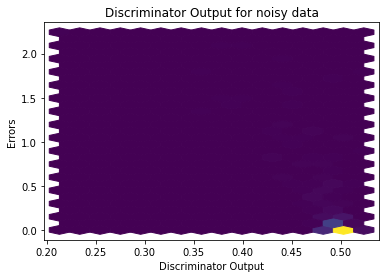

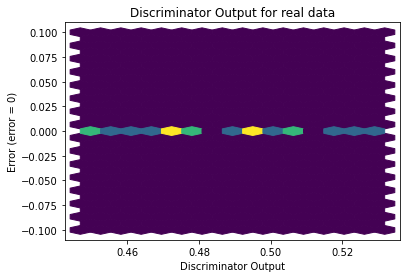

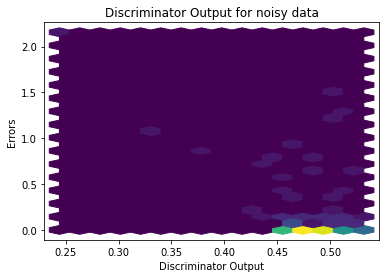

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1295]], requires_grad=True)
